In [1]:
import porespy as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from genrandsp import *

## Method I : Porosity

In [2]:
gsp = generate_spherepack([200, 200, 200], [12, 8, 4], 0.25, loop_limits=4000)

In [3]:
sphere_coords = gsp.method_I(0.7)

Loop #00500, n_spheres=00400, porosity=0.8464
Loop #01000, n_spheres=00646, porosity=0.8232
Loop #01500, n_spheres=00837, porosity=0.8101
Loop #02000, n_spheres=00978, porosity=0.8018
Removed 12 from the list of sphere sizes at loop 2000...
Loop #02000, n_spheres=00978, porosity=0.8018
Loop #02500, n_spheres=01089, porosity=0.7969
Loop #03000, n_spheres=01202, porosity=0.7927
Loop #03500, n_spheres=01295, porosity=0.7886
Reached number of loops limit!
You can change this by setting generate_spherepack.loop_limits to the number you want

Final state:
Loop #04000, n_spheres=01374, porosity=0.7846
Number of spheres of each size : {12: 128, 8: 243, 4: 1002}


In [4]:
df = pd.DataFrame(np.copy(sphere_coords), columns=['X', 'Y', 'Z', 'R'])
print(df)
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

               X           Y           Z     R
0      51.302581   32.653008   94.719853  12.0
1      94.954915  133.459159   26.326581  12.0
2      50.227515  181.411212  182.432086  12.0
3     160.160495  153.313173   21.093742  12.0
4     117.429266   97.860982   46.479105  12.0
...          ...         ...         ...   ...
1369  186.178657  167.348710  138.222237   4.0
1370   16.971521   15.371755  140.797599   4.0
1371   80.983248  105.553319   33.525131   4.0
1372  144.402293  155.671745   24.618403   4.0
1373  122.356453  178.129055   76.901378   4.0

[1374 rows x 4 columns]


186.88250669357214

Generate Image using porespy

In [5]:
im = ps.generators.spheres_from_coords(df)

In [6]:
print(f"Image poro : {1-np.count_nonzero(im)/im.size:.4f}")
print(f"Image size : {im.shape}")

Image poro : 0.7808
Image size : (200, 196, 197)


Save Image as numpy array

In [7]:
np.save('rand_sphere_pack_M1',im)

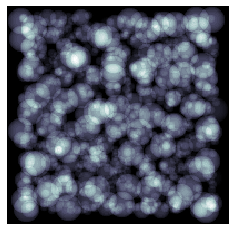

In [8]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

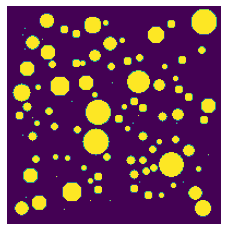

In [9]:
fig, ax = plt.subplots()
ax.imshow(im[:,:,np.random.randint(0, len(im))])
ax.axis(False);

## Method II : Number of Spheres

In [10]:
gsp = generate_spherepack([200, 200, 200], [8, 18, 4], 0.25)

In [11]:
sphere_coords = gsp.method_II(2000)

Loop #00500, n_spheres=00343, porosity=0.8414
Loop #01000, n_spheres=00553, porosity=0.8226
Loop #01500, n_spheres=00712, porosity=0.8143
Loop #02000, n_spheres=00830, porosity=0.8077
Removed 18 from the list of sphere sizes at loop 2000...
Loop #02000, n_spheres=00830, porosity=0.8077
Loop #02500, n_spheres=00952, porosity=0.8029
Loop #03000, n_spheres=01033, porosity=0.7997
Loop #03500, n_spheres=01114, porosity=0.7963
Loop #04000, n_spheres=01186, porosity=0.7937
Removed 8 from the list of sphere sizes at loop 4000...
Loop #04000, n_spheres=01186, porosity=0.7937
Loop #04500, n_spheres=01240, porosity=0.7919
Loop #05000, n_spheres=01300, porosity=0.7899
Loop #05500, n_spheres=01366, porosity=0.7876
Loop #06000, n_spheres=01418, porosity=0.7859
Loop #06500, n_spheres=01464, porosity=0.7844
Loop #07000, n_spheres=01512, porosity=0.7828
Loop #07500, n_spheres=01559, porosity=0.7812
Loop #08000, n_spheres=01594, porosity=0.7800
Loop #08500, n_spheres=01627, porosity=0.7789
Loop #09000, 

In [12]:
df = pd.DataFrame(np.copy(sphere_coords), columns=['X', 'Y', 'Z', 'R'])
print(df)
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

               X           Y           Z     R
0     114.096781  164.977415   68.568833  18.0
1      38.844738  126.602856  103.249136  18.0
2      92.343165  141.783933   29.523208  18.0
3      88.811583   19.817415   79.804589   8.0
4      79.566733  122.022824  106.395019  18.0
...          ...         ...         ...   ...
1734  166.896365   74.823664   41.415011   4.0
1735  106.163741  171.833650   99.467971   4.0
1736   47.530979   70.630853   95.527978   4.0
1737   84.179557  100.351093   28.108599   4.0
1738   29.443845  121.500381   82.813758   4.0

[1739 rows x 4 columns]


181.03723825662655

Generate Image using porespy

In [13]:
im = ps.generators.spheres_from_coords(df)

In [14]:
print(f"Image poro : {1-np.count_nonzero(im)/im.size:.4f}")
print(f"Image size : {im.shape}")

Image poro : 0.7582
Image size : (193, 191, 199)


Save Image as numpy array

In [15]:
np.save('rand_sphere_pack_M1',im)

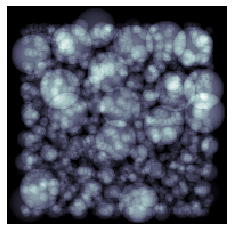

In [16]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

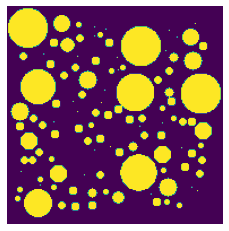

In [17]:
fig, ax = plt.subplots()
ax.imshow(im[:,:,np.random.randint(0, len(im))])
ax.axis(False);